In [19]:
# pehle libraryimport karte hai 
import numpy as np
#serializing(converting structured data to a format)karne ke liye data ko 
import pickle
import tensorflow as tf
#for splitting the data set 
from sklearn.model_selection import train_test_split
# data set ko random shuffling karne ke liye 
from sklearn.utils import shuffle
# ye layers banane ke kaam aayega 
from keras.layers import MaxPooling2D, Dropout
from keras.layers import Input, Dense, Activation, Flatten, Conv2D, Lambda
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam

In [20]:
# aab model bana achalue karte hai 
def keras_model():
    model = Sequential()
    # pehle lambda layer banaya for normalizing the input data 
    model.add(Lambda(lambda x: x / 127.5 - 1., input_shape=(40, 40, 1)))

    # phir 3 layer banaya hidden wala 
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), padding='valid'))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), padding='valid'))

    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), padding='valid'))

    # flattnen kiya layer ko so that 2d ko 1d me convert kar paye 
    model.add(Flatten())
    model.add(Dropout(0.5))

    model.add(Dense(128))

    model.add(Dense(64))
    model.add(Dense(1))

    model.compile(optimizer=Adam(lr=0.0001), loss="mse", metrics=['accuracy'])
    #jub last time model ko train kiye to wo is file me save ho jayega
    filepath = "lasttimefile.h5"
    checkpoint1 = ModelCheckpoint(filepath, verbose=1, save_best_only=True)
    callbacks_list = [checkpoint1]
    return model, callbacks_list

In [21]:
model, callbacks_list = keras_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_3 (Lambda)           (None, 40, 40, 1)         0         
                                                                 
 conv2d_9 (Conv2D)           (None, 40, 40, 32)        320       
                                                                 
 activation_9 (Activation)   (None, 40, 40, 32)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 20, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 20, 20, 64)        18496     
                                                                 
 activation_10 (Activation)  (None, 20, 20, 64)        0         
                                                      

/Users/hemant./anaconda3/lib/python3.11/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [22]:
# feature and label ko 1 file me dal de rhe so that easi;y accesable ho 
def load_pickle():
    with open("feature_file", "rb") as f:
        features = np.array(pickle.load(f))
    with open("labels", "rb") as f:
        labels = np.array(pickle.load(f))

    return features, labels

In [23]:
def augment_the_data(features, labels):
    features = np.append(features, features[:, :, ::-1], axis=0)
    labels = np.append(labels, -labels, axis=0)
    return features, labels

In [24]:
#  is finction me test and training and test data me split kar de rhe 
#  reshape bhi kar rhe so that model me fit ho ske 
def main():
    features, labels = load_pickle()
    features, labels = augment_the_data(features, labels)
    features, labels = shuffle(features, labels)
    train_x, test_x, train_y, test_y = train_test_split(features, labels, random_state=2327,
                                                        test_size=0.4)
    train_x = train_x.reshape(train_x.shape[0], 40, 40, 1)
    test_x = test_x.reshape(test_x.shape[0], 40, 40, 1)
    model, callbacks_list = keras_model()
    history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=10, batch_size=128,
              callbacks=callbacks_list)  
    model.summary() 
    model.save('lasttimefile.h5')
    return history, model, test_x, test_y

history, model, test_x, test_y = main()   

predicted_angles = model.predict(test_x)

Epoch 1/10
598/599 [============================>.] - ETA: 0s - loss: 0.2071 - accuracy: 0.0390
Epoch 1: val_loss improved from inf to 0.19411, saving model to lasttimefile.h5
599/599 [==============================] - 52s 86ms/step - loss: 0.2071 - accuracy: 0.0390 - val_loss: 0.1941 - val_accuracy: 0.0391
Epoch 2/10
598/599 [============================>.] - ETA: 0s - loss: 0.1826 - accuracy: 0.0388
Epoch 2: val_loss improved from 0.19411 to 0.16732, saving model to lasttimefile.h5
599/599 [==============================] - 57s 96ms/step - loss: 0.1825 - accuracy: 0.0388 - val_loss: 0.1673 - val_accuracy: 0.0385
Epoch 3/10
598/599 [============================>.] - ETA: 0s - loss: 0.1661 - accuracy: 0.0386
Epoch 3: val_loss improved from 0.16732 to 0.15509, saving model to lasttimefile.h5
599/599 [==============================] - 55s 93ms/step - loss: 0.1662 - accuracy: 0.0386 - val_loss: 0.1551 - val_accuracy: 0.0384
Epoch 4/10
598/599 [============================>.] - ETA: 0s - l

In [25]:
# predicted_angles = model.predict(test_x)

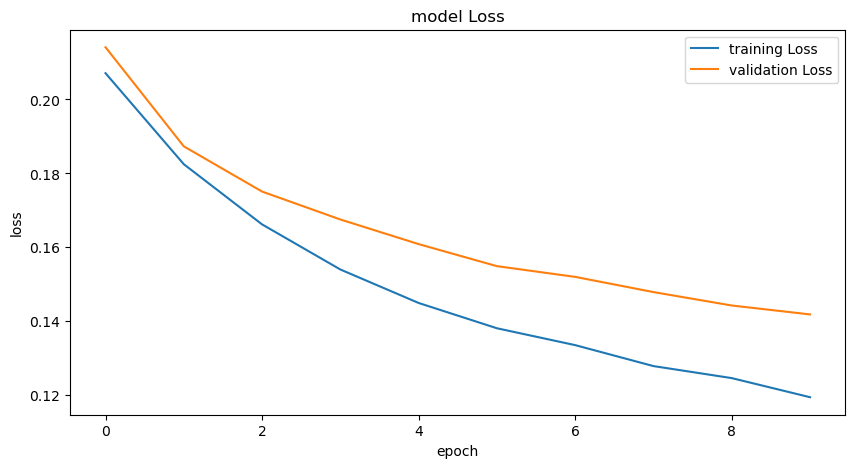

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='training Loss')
plt.plot(np.asarray(history.history['val_loss']) + 0.02, label='validation Loss')
plt.title('model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()
